<a href="https://colab.research.google.com/github/gewasaad/Data-Science-Basics/blob/main/week_15_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
df=pd.read_csv('/content/train_kaggle_housing.csv')
df

In [5]:
# 1.Identify and impute missing values in a selected column using the median for numerical features or a placeholder for categorical features.
#for numerical features:
numeric_cols=df.select_dtypes(include=['number']).columns
for x in numeric_cols:
    df[x].fillna(df[x].median(), inplace=True)
#for categorical features:
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
for x in categorical_cols:
    a= df[categorical_cols].apply (lambda x: pd.to_numeric(x, errors='coerce')).isna().sum()
well_behaved_cols=a[a==0].index
# Handling missing values in a dataset before applying machine learning models is crucial for several reasons, and neglecting to do so can adversely affect the performance and accuracy of your models.

In [21]:
# 2. Encoding Categorical Variables:
#Choose a categorical variable other than 'MSZoning' and 'Neighborhood', and apply one-hot encoding to it.
df['RoofStyle']
unique_values= df['RoofStyle'].unique()
for y in unique_values:
    df[y]= (df['RoofStyle']==y)
df[unique_values]

,Gable,Hip,Gambrel,Mansard,Flat,Shed
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False
...,...,...,...,...,...,...
1455,True,False,False,False,False,False
1456,True,False,False,False,False,False
1457,True,False,False,False,False,False
1458,False,True,False,False,False,False


In [ ]:
# second option
pd.get_dummies(df['HouseStyle'])


<Axes: >

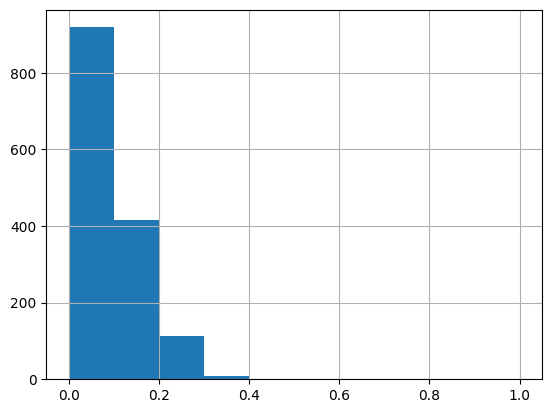

In [40]:
#Identify two numerical features other than 'TotalBsmtSF' and 'GrLivArea' and apply standard scaling to them.
df['BsmtFinSF1']
min_values= df['BsmtFinSF1'].min()
max_values=df['BsmtFinSF1'].max()
df['BsmtFinSF1_minus_mins']= df['BsmtFinSF1']- min_values
df['normed_BsmtFinSF1']= df['BsmtFinSF1_minus_mins']/(max_values-min_values)
df['normed_BsmtFinSF1'].hist()
